In [27]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

FOLDER = "/Users/brendan/Projects/trails/data/"

# sns.set_context("talk")
DPI = 300


In [10]:
datafiles = [
    "optimality|2025-07-08/data.json",
]

dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
util.describe(df)

ratios: [50.0 100.0 150.0 200.0]
patch recovery: [0.001]
max costs: [2.0 8.0]
boundary conditions: ['SOLID']
num locations: [10]
random walker seeds: 4
random locations seeds: 2
patch recovery logic: ['LINEAR']
settings.searchStrategy : ['KANAI_SUZUKI']
steps: 10000
Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement',
       'thresholdImprovement', 'steps', 'paths', 'weightedHeadings',
       'avgHeading', 'avgSquareHeading', 'patches',
       'settings.patchImprovement', 'settings.patchRecovery',
       'settings.maxCost', 'settings.boundaryConditions',
       'settings.numLocations', 'settings.randomSeedWalkers',
       'settings.randomSeedLocations', 'settings.recoveryLogic',
       'settings.improvementLogic', 'settings.searchStrategy', 'ratio'],
      dtype='object')


In [13]:
EXAMPLE_RATIOS = [50, 100, 200]
STEPS = 10000
COLORS = [sns.color_palette("rocket")[1], sns.color_palette("rocket")[3], sns.color_palette("rocket")[5]]

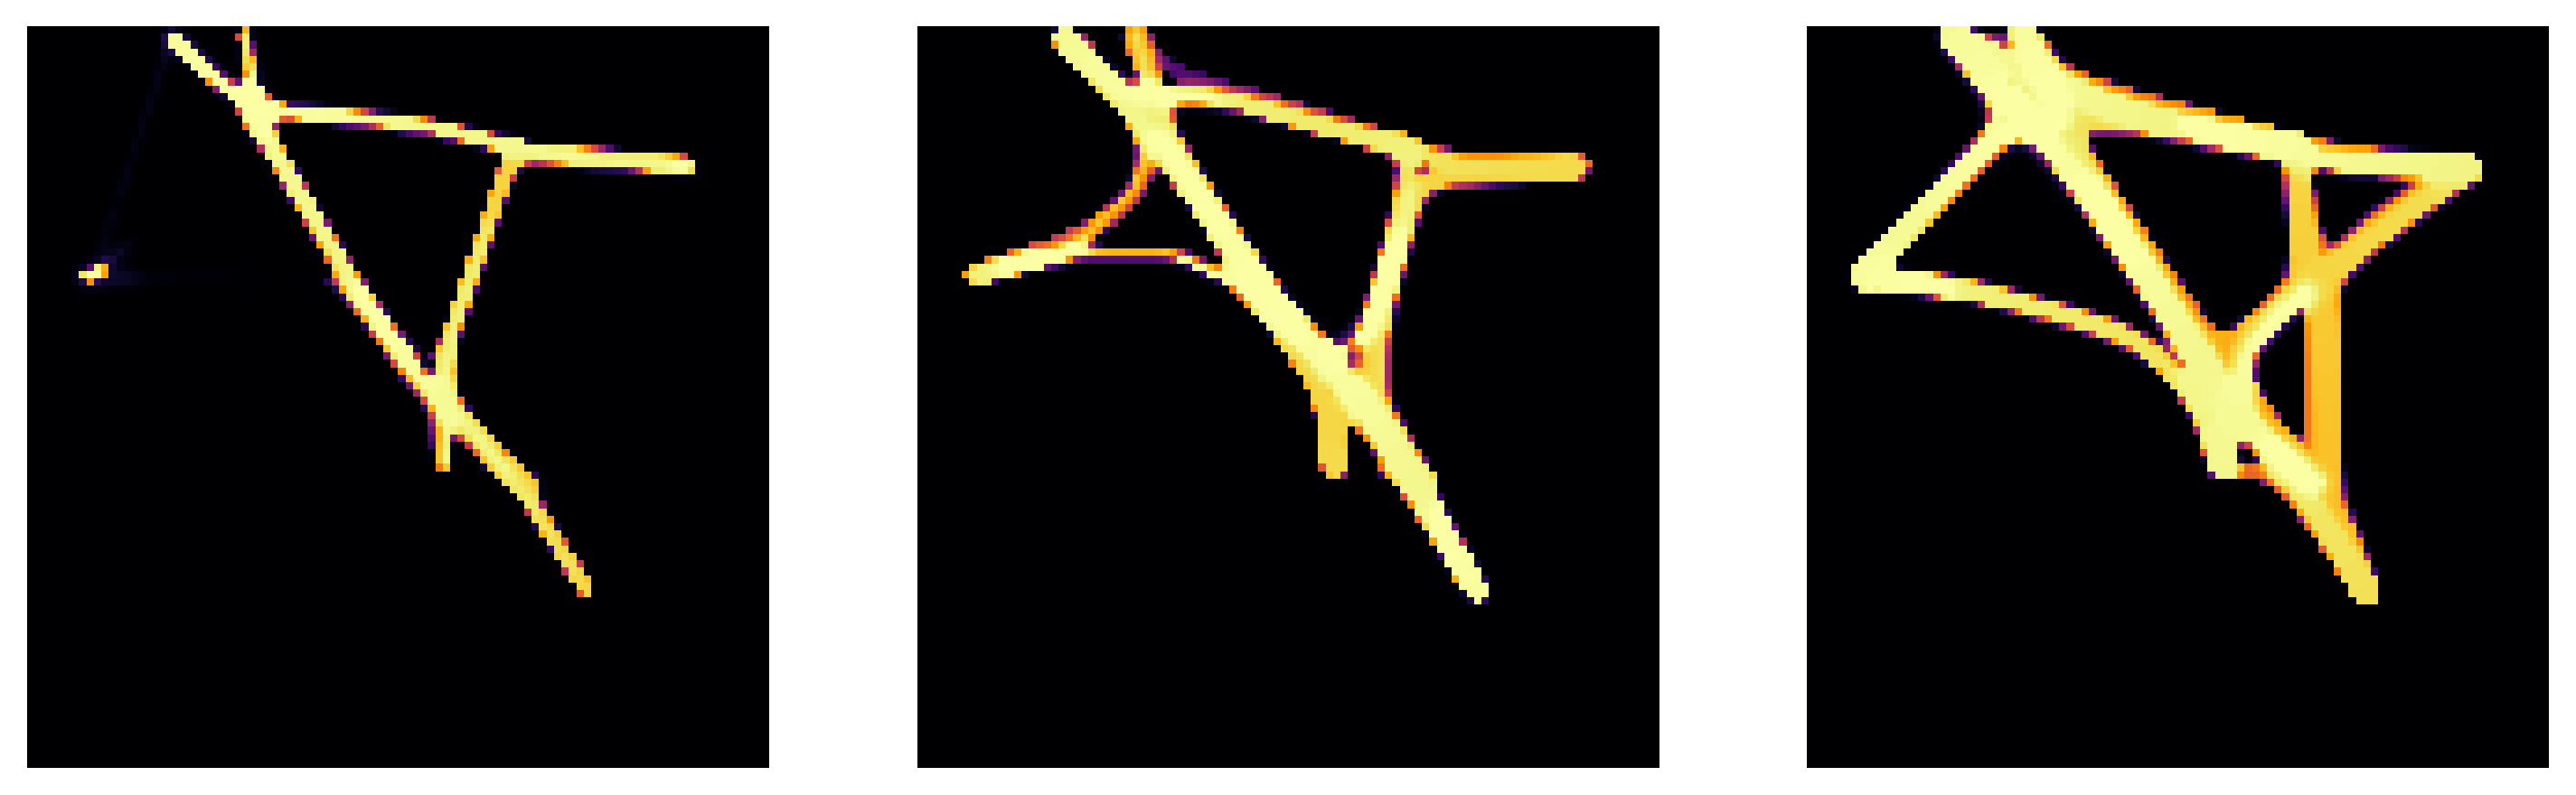

In [33]:
# TODO - load the right dataframe for these.

_df = df[
    (df["steps"] == STEPS) &
    (df["settings.numLocations"] == 10)
]

LENGTH = 4
fig, axs = plt.subplots(1, len(EXAMPLE_RATIOS), figsize=(len(EXAMPLE_RATIOS)*LENGTH, LENGTH), dpi=DPI)
# plt.subplots_adjust(wspace=0.5, hspace=0.2)
for i, ratio in enumerate(EXAMPLE_RATIOS):
    row = _df[(_df["ratio"] == ratio) & (_df["steps"] == STEPS)].iloc[0]

    axs[i].imshow(np.reshape(row["patches"], (100, 100)), cmap="inferno")
    axs[i].axis('off')

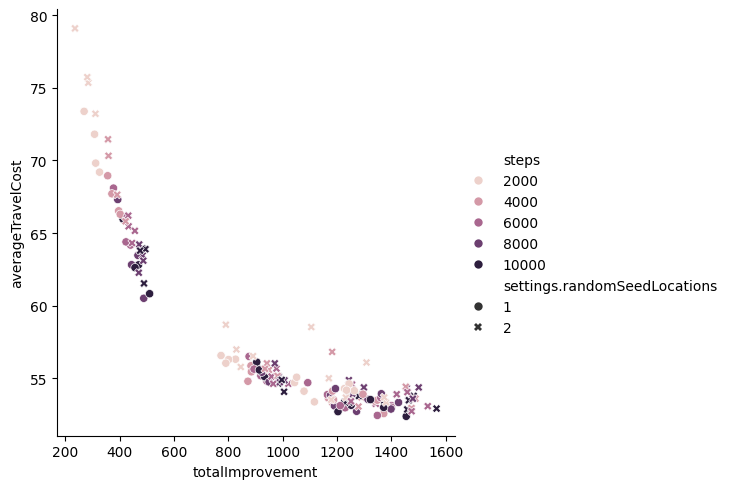

In [25]:
_df = df[
    (df["steps"] % 2000 == 0) &
    (df["steps"] > 0) &
    (df["settings.numLocations"] == 10) &
    (df["settings.maxCost"] == 2.0)
]

p = sns.relplot(
    data=_df,
    y="averageTravelCost",
    x="totalImprovement",
    # size="ratio",
    hue="steps",
    kind="scatter",
    style="settings.randomSeedLocations"
)